In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.constants import golden
plt.style.use('default')
plt.rc('figure', figsize=((5.0, 5.0 / golden)))

# VARIABILI
csvfile = 'csv/alldata.csv'
distance_param = 'CDistance'
colori = ['blue', 'red', 'orange', 'limegreen', 'purple']
myindex = [
    '7:00', '8:00', '9:00', '10:00',
    '11:00', '12:00', '13:00', '14:00',
    '15:00','16:00', '17:00', '18:00',
    '19:00', '20:00', '21:00', '22:00',
    '23:00']

# LETTURA DATI
tragitti = pd.read_csv(csvfile, index_col=False)
pre_lock_cond = (tragitti['Month'] == 3) & (tragitti['Day'] <= 12)
post_lock_cond = ((tragitti['Month'] == 5) & (tragitti['Day'] >= 4)) | (tragitti['Month'] > 5)
tragitti = tragitti[post_lock_cond]

def clean(df):
    distance_cond = df[distance_param] > 0
    moovit_cond = df['Public'] > 12
    public_cond = df['Public'] > 0
    bike_cond = df['Bike'] > 0
    foot_cond = df['Foot'] > 0
    car_cond = df['Car'] > 0
    car2go_cond = df['Car2Go'] > 0
    enjoy_cond = df['Enjoy'] > 0
    coherence_cond = (df['Car'] <= df['Car2Go']) & (df['Car'] <= df['Enjoy'])
    cleaned = distance_cond & public_cond & bike_cond & foot_cond & car_cond & car2go_cond & enjoy_cond & coherence_cond
    return cleaned

In [2]:
# Velocita' media durante il giorno
def vmedia_giorno(df, mezzo):
    ore = range(7, 24)
    vmedia_giorno_ore = []
    for ora in ore:
        tragitti_fascia_oraria = df[df['Hour'] == ora]
        velocita_media_oraria = (tragitti_fascia_oraria[distance_param] * 60.) / tragitti_fascia_oraria[mezzo]
        vmedia_giorno_ore.append(velocita_media_oraria.mean())
    return vmedia_giorno_ore
    
def vmedia_week(df, mezzo):    
    lst = [vmedia_giorno(df, mezzo)]
    array = np.array(lst).T
    
    return pd.DataFrame(array, index=myindex, columns=[mezzo]).round(2)

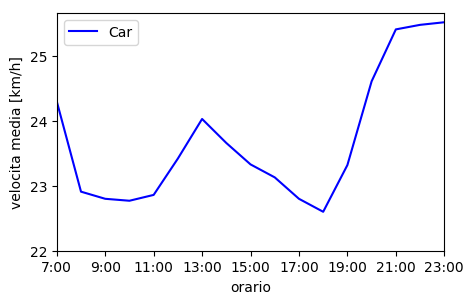

In [3]:
tragitti = tragitti[clean(tragitti)]

vmedia_week(tragitti, 'Car').plot(color=colori[0])
plt.yticks(range(22, 26))
plt.xlabel('orario')
plt.ylabel('velocita media [km/h]')
plt.show()

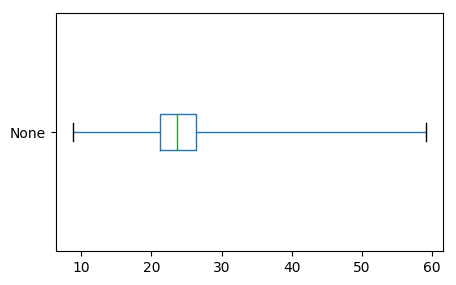

In [4]:
df = (tragitti[distance_param] * 60.) / tragitti['Car']
df.plot.box(vert=False, whis='range')
plt.show()

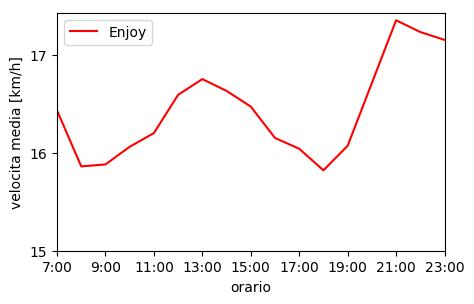

In [5]:
vmedia_week(tragitti, 'Enjoy').plot(color=colori[1])
plt.yticks(range(15, 18))
plt.xlabel('orario')
plt.ylabel('velocita media [km/h]')
plt.show()

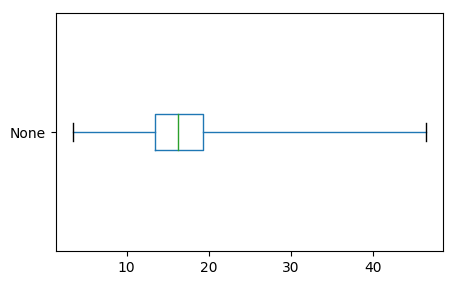

In [6]:
df = (tragitti[distance_param] * 60.) / tragitti['Enjoy']
df.plot.box(vert=False, whis='range')
plt.show()

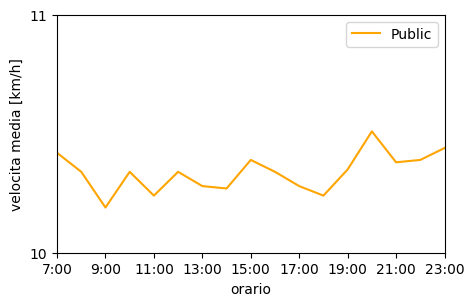

In [7]:
vmedia_week(tragitti, 'Public').plot(color=colori[2])
plt.yticks(range(10, 12))
plt.xlabel('orario')
plt.ylabel('velocita media [km/h]')
plt.show()

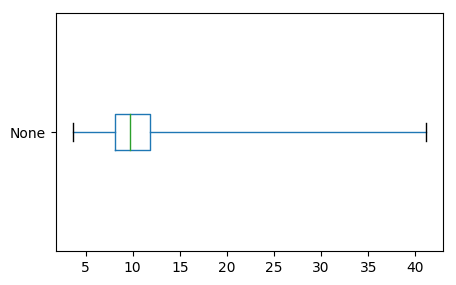

In [8]:
df = (tragitti[distance_param] * 60.) / tragitti['Public']
df.plot.box(vert=False, whis='range')
plt.show()

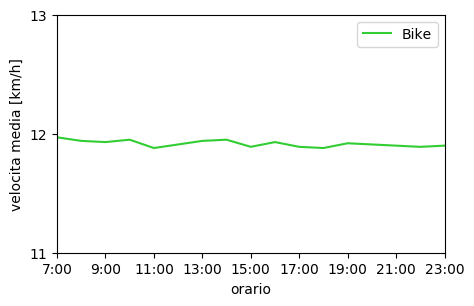

In [9]:
distance_param = 'FDistance'
vmedia_week(tragitti, 'Bike').plot(color=colori[3])
plt.yticks(range(11, 14))
plt.xlabel('orario')
plt.ylabel('velocita media [km/h]')
plt.show()

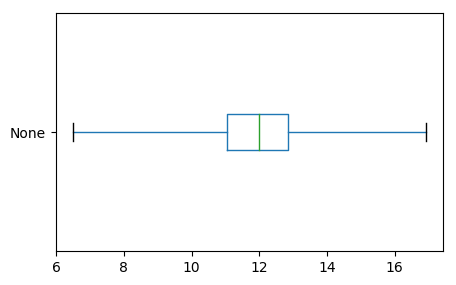

In [10]:
df = (tragitti[distance_param] * 60.) / tragitti['Bike']
df.plot.box(vert=False, whis='range')
plt.show()

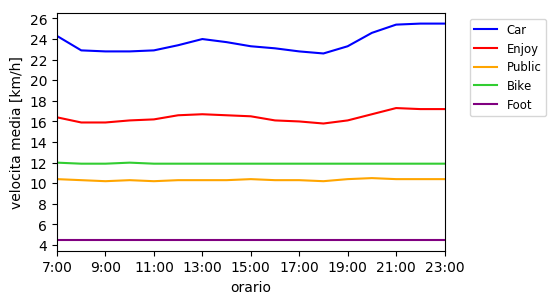

In [11]:
distance_param = 'CDistance'
lst = [
    vmedia_giorno(tragitti, 'Car'),
    vmedia_giorno(tragitti, 'Enjoy'),
    vmedia_giorno(tragitti, 'Public')]

distance_param = 'FDistance'
lst.append(vmedia_giorno(tragitti, 'Bike'))
lst.append(vmedia_giorno(tragitti, 'Foot'))

array = np.array(lst).T

x = pd.DataFrame(array, index=myindex, columns=['Car', 'Enjoy', 'Public', 'Bike', 'Foot']).round(1)
x.plot(color=colori)
plt.yticks(range(4, 27, 2))
plt.xlabel('orario')
plt.ylabel('velocita media [km/h]')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()

In [12]:
velocita_media = (tragitti[distance_param] * 60.) / tragitti['Car']
velocita_media.describe()

count    49560.000000
mean        19.663127
std          3.925315
min          6.692571
25%         16.981850
50%         19.535200
75%         22.183051
max         48.576000
dtype: float64

In [13]:
velocita_media.median()

19.535200000000003

In [14]:
velocita_media = (tragitti[distance_param] * 60.) / tragitti['Enjoy']
velocita_media.describe()

count    49560.000000
mean        13.576874
std          3.813596
min          3.047143
25%         10.825023
50%         13.277434
75%         16.011168
max         36.175800
dtype: float64

In [15]:
velocita_media.median()

13.277434210526316

In [16]:
velocita_media = (tragitti[distance_param] * 60.) / tragitti['Public']
velocita_media.describe()

count    49560.000000
mean         8.383746
std          2.283551
min          3.417067
25%          6.746860
50%          7.951975
75%          9.572630
max         27.819500
dtype: float64

In [17]:
velocita_media.median()

7.951975384615384

In [18]:
velocita_media = (tragitti[distance_param] * 60.) / tragitti['Bike']
velocita_media.describe()

count    49560.000000
mean        11.916091
std          1.328412
min          6.510923
25%         11.050980
50%         11.992858
75%         12.845615
max         16.921800
dtype: float64

In [19]:
velocita_media.median()

11.99285775862069

In [20]:
velocita_media = (tragitti[distance_param] * 60.) / tragitti['Foot']
velocita_media.describe()

count    49560.000000
mean         4.490490
std          0.026456
min          4.327650
25%          4.471354
50%          4.490108
75%          4.509067
max          4.575600
dtype: float64

In [21]:
velocita_media.median()

4.490108108108108